In [5]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.3.0
appdirs                      1.4.4
asttokens                    2.1.0
astunparse                   1.6.3
backcall                     0.2.0
CacheControl                 0.12.11
cachetools                   5.2.0
certifi                      2022.9.24
charset-normalizer           2.1.1
click                        8.1.3
colorama                     0.4.6
comtypes                     1.1.14
contourpy                    1.0.6
cycler                       0.11.0
debugpy                      1.6.3
decorator                    5.1.1
entrypoints                  0.4
executing                    1.2.0
flatbuffers                  22.10.26
fonttools                    4.38.0
gast                         0.4.0
google-auth                  2.14.0
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.50.0
h5py                         3.7.0



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# removing unclear images

In [7]:
import cv2
import imghdr

In [8]:
data_dir = 'augmented' 

In [9]:
data_dir1='snake_toad'
os.listdir(data_dir1)

['Frog', 'sai.jpg', 'snake', 'test.jpg', 'test2.jpg', 'toad']

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
os.listdir(data_dir)

['lizard', 'turtle']

In [11]:
for image_class in os.listdir(data_dir): 
    print(image_class)

lizard
turtle


In [12]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

# load data

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)


Found 12000 files belonging to 2 classes.


In [42]:
data1=tf.keras.utils.image_dataset_from_directory(data_dir1)

Found 100 files belonging to 2 classes.


In [13]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# scale data

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [22]:
catgry = os.listdir(data_dir)
print(catgry)

['lizard', 'turtle']


# split data

In [16]:
len(data)

375

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [18]:
print(train_size)
print(val_size)
print(test_size)

262
75
38


In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [10]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# DL using CNN

In [21]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [25]:
model.compile(optimizer = 'rmsprop',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# training

In [27]:
logdir='logs'

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
262/262 [==============================] - 223s 847ms/step - loss: 0.4511 - accuracy: 0.7997 - val_loss: 0.1530 - val_accuracy: 0.9446
Epoch 2/20
262/262 [==============================] - 212s 808ms/step - loss: 0.1349 - accuracy: 0.9621 - val_loss: 0.0764 - val_accuracy: 0.9704
Epoch 3/20
262/262 [==============================] - 215s 819ms/step - loss: 0.0696 - accuracy: 0.9849 - val_loss: 0.0222 - val_accuracy: 0.9912
Epoch 4/20
262/262 [==============================] - 214s 816ms/step - loss: 0.0692 - accuracy: 0.9843 - val_loss: 0.0166 - val_accuracy: 0.9937
Epoch 5/20
262/262 [==============================] - 204s 779ms/step - loss: 0.0517 - accuracy: 0.9933 - val_loss: 0.6497 - val_accuracy: 0.8625
Epoch 6/20
262/262 [==============================] - 204s 777ms/step - loss: 0.0313 - accuracy: 0.9908 - val_loss: 0.0259 - val_accuracy: 0.9904
Epoch 7/20
262/262 [==============================] - 208s 793ms/step - loss: 0.0464 - accuracy: 0.9911 - val_loss: 0.0167 -

# loss

In [ ]:
fig = plt.figure()

plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')

fig.suptitle('Loss', fontsize=20)

plt.legend(loc="upper right")
plt.show()

# accuracy

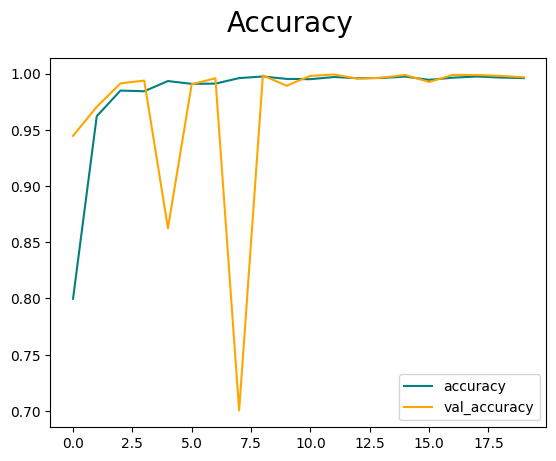

In [31]:
fig = plt.figure()

plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')

fig.suptitle('Accuracy', fontsize=20)

plt.legend(loc="lower right")
plt.show()

# evaluation

In [44]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [45]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

for batch in test.as_numpy_iterator():
    cmp = [] 
    X, y = batch
    yhat = model.predict(X)

    for j in range(len(yhat)):
        cmp.append(np.argmax(yhat[j]))
    
    print(y)
    print(cmp)

    print(r2_score(y,cmp))

    pre.update_state(y, cmp)
    re.update_state(y, cmp)
    acc.update_state(y, cmp)

In [ ]:
print(f"precision : {pre.result().numpy()}")
print(f"Recall : {re.result().numpy()}")
print(f"accuracy : {acc.result().numpy()}")

# test

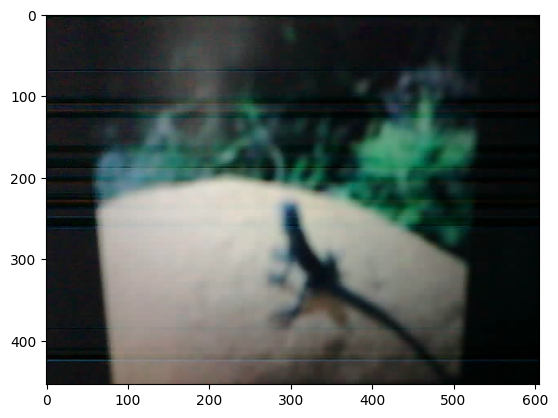

In [13]:
img = cv2.imread('snake_toad/test.jpg')
plt.imshow(img)
plt.show()

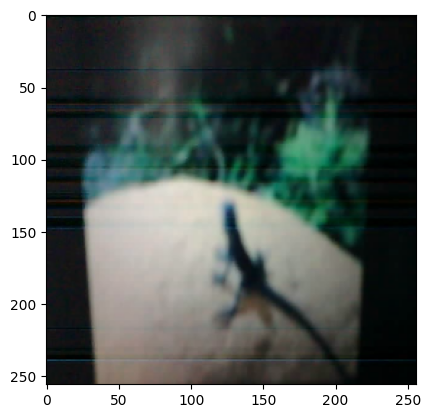

In [14]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [15]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 1s 788ms/step


In [16]:
print(yhat)

[[1. 0. 0. 0.]]


In [17]:
for i in range(4):
    if(yhat[0][i]==1.):
        yhat[0][i]=1.
    else:
        yhat[0][i]=0.

In [18]:
print(yhat)

[[1. 0. 0. 0.]]


In [19]:
#yhat = yhat.round()
pval = np.argmax(yhat)

#print(yhat)
print(pval)

0


In [20]:
def check_same(yhat):
    x=yhat[0][1]
    a=True
    for j in range(4):
        if x!=yhat[0][j]:
            a=False
    return(a)

In [23]:
if(check_same(yhat)):
    print(f'New species has been discovered!!')
elif(pval == 0): 
    print(f'Predicted class is {catgry[0]}')
elif(pval == 1):
    print(f'Predicted class is {catgry[1]}')


Predicted class is lizard


# model

In [1]:
from tensorflow.keras.models import load_model

In [39]:
model.save(os.path.join('models','imageclassifier.h5'))

In [2]:
import os

In [3]:
model = load_model(os.path.join('models','imageclassifier.h5'))

In [4]:
model.predict(np.expand_dims(resize/255, 0))

NameError: name 'np' is not defined